<p align="center">
  <img src="Cognifyz.png" alt="Your Image Description" />
</p>


#

## Level -3

In [28]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')


In [29]:
#reading the datset
df = pd.read_csv('Dataset .csv')
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [30]:
# Data set basic Understanding 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [31]:
#checking rows and columns
df.shape

(9551, 21)

In [32]:
#checking nulls
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [33]:
#checking duplicates
df[df.duplicated()]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes


#### The dataset seems to be clean and ready for performing the assigned tasks .... Lets begin...

#

## Task- 2

<p align="center">
  <img src="Level-3 T-2.png" alt="Your Image Description" />
</p>


#

### 1. Identify the restaurants with the highest and lowest number of votes.

In [45]:
votes = df[['Restaurant Name','Votes']]

lowest_votes = votes[votes['Votes'] == votes['Votes'].min()]
highest_votes = votes[votes['Votes'] == votes['Votes'].max()]


print("Restaurants with the Highest Votes:")
print(highest_votes)

print("\nRestaurants with the Lowest Votes:")
print(lowest_votes)

Restaurants with the Highest Votes:
    Restaurant Name  Votes
728            Toit  10934

Restaurants with the Lowest Votes:
                 Restaurant Name  Votes
69              Cantinho da Gula      0
874                The Chaiwalas      0
879           Fusion Food Corner      0
880                Punjabi Rasoi      0
887                Baskin Robbin      0
...                          ...    ...
9044               6 Packs Momos      0
9098                   Cafe' Wow      0
9099  Chef's Basket Pop Up Caf��      0
9103            The Hangout-Deli      0
9111                    Platters      0

[1094 rows x 2 columns]


### 2. Analyze if there is a correlation between the number of votes and the rating of a restaurant.

Correlation between Votes and Aggregate rating: 0.31


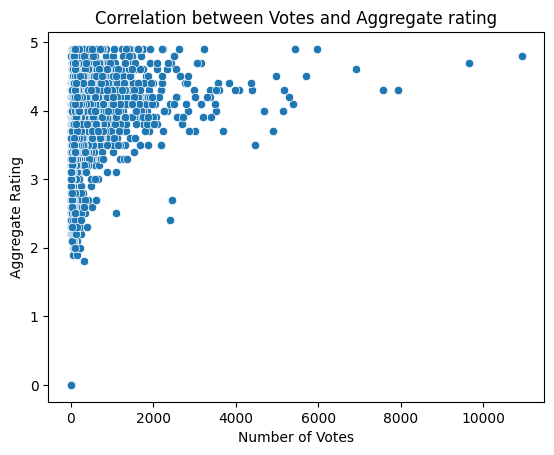

In [ ]:
correlation = df['Votes'].corr(df['Aggregate rating'])

# Display the correlation coefficient
print(f"Correlation between Votes and Aggregate rating: {correlation:.2f}")

# Create a scatter plot to visualize the relationship
sns.scatterplot(x='Votes', y='Aggregate rating', data=df)
plt.title('Correlation between Votes and Aggregate rating')
plt.xlabel('Number of Votes')
plt.ylabel('Aggregate Rating')
plt.show()
    

### Observation

- There is Positive Correlation between Votes and Aggregate rating.
- It suggests a strong positive correlation. This means that as the number of votes increases, the aggregate rating tends to increase as well.
- Customers are likely to give higher ratings to restaurants that receive more votes.
- A positive correlation could suggest that more engaged customers, who take the time to vote, are generally satisfied with their dining experiences.
- This could be valuable information for understanding customer preferences and satisfaction.

#

## Task -3

<p align="center">
  <img src="Level-3 T-3.png" alt="Your Image Description" />
</p>


#

### 1. Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

In [58]:
# Convert 'Yes'/'No' to 1/0 for the 'Has Table booking' and 'Has Online delivery' columns
df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})

# Check if the conversion is successful
print(df[['Has Table booking', 'Has Online delivery']].head())


   Has Table booking  Has Online delivery
0                  1                    0
1                  1                    0
2                  1                    0
3                  0                    0
4                  1                    0


In [59]:
# Group by Price Range and calculate the percentage of restaurants offering online delivery and table booking
price_range_analysis = df.groupby('Price range').agg({
    'Has Table booking': 'mean',  # Average value (1 if True, 0 if False)
    'Has Online delivery': 'mean'  # Average value (1 if True, 0 if False)
}).reset_index()

# Multiply by 100 to convert to percentage
price_range_analysis['Table Booking (%)'] = price_range_analysis['Has Table booking'] * 100
price_range_analysis['Online Delivery (%)'] = price_range_analysis['Has Online delivery'] * 100

# Display the results
print(price_range_analysis)


   Price range  Has Table booking  Has Online delivery  Table Booking (%)  \
0            1           0.000225             0.157741           0.022502   
1            2           0.076775             0.413106           7.677482   
2            3           0.457386             0.291903          45.738636   
3            4           0.467577             0.090444          46.757679   

   Online Delivery (%)  
0            15.774077  
1            41.310633  
2            29.190341  
3             9.044369  


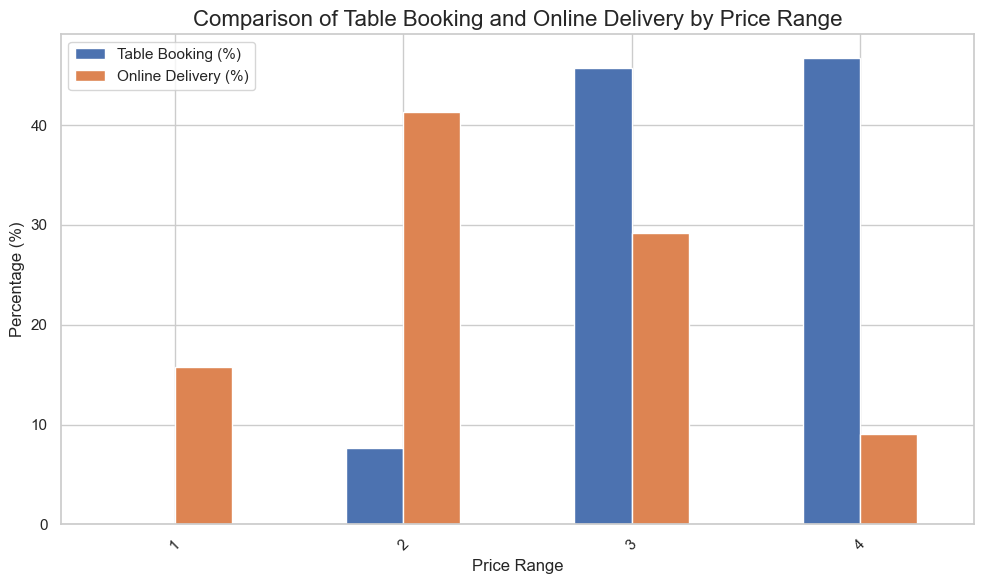

In [61]:

# Set a style for the plot
sns.set(style="whitegrid")

# Create a figure and axes for plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bar chart for Table Booking and Online Delivery
price_range_analysis.set_index('Price range')[['Table Booking (%)', 'Online Delivery (%)']].plot(kind='bar', ax=ax)

# Adding labels and title
plt.title('Comparison of Table Booking and Online Delivery by Price Range', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Price Range', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


### Observation:

**The graph presents a comparison of table booking and online delivery percentages across four different price ranges. It appears that online delivery is generally more popular than table booking, with a few exceptions in certain price ranges.**

1.Online Delivery Dominance:

- In four out of the four price ranges, online delivery has a  percentage compared to table booking which has only in three .
- This suggests that online food ordering has become the preferred mode for many customers, regardless of the price point.

2.Table Booking in Higher Price Range: Table booking has a higher percentage in the Higher price range.

- Customers in this price range may prefer dining out for the experience and social interaction.



#

### 2. Determine if higher-priced restaurants are more likely to offer these services.

In [67]:
df.loc[df['Has Table booking'] == 'No', 'Has Table booking'] = 0
df.loc[df['Has Table booking'] == 'Yes', 'Has Table booking'] = 1

df.loc[df['Has Online delivery'] == 'No', 'Has Online delivery'] = 0
df.loc[df['Has Online delivery'] == 'Yes', 'Has Online delivery'] = 1


In [68]:
service_percentage = df.groupby('Price range').agg({
    'Has Online delivery': 'mean',
    'Has Table booking': 'mean'
}).reset_index()


In [69]:
# Multiply by 100 to convert to percentage
service_percentage['Has Online delivery'] = service_percentage['Has Online delivery'] * 100
service_percentage['Has Table booking'] = service_percentage['Has Table booking'] * 100


In [70]:
print("Percentage of Restaurants Offering Services by Price Range:")
print(service_percentage)


Percentage of Restaurants Offering Services by Price Range:
   Price range  Has Online delivery  Has Table booking
0            1            15.774077           0.022502
1            2            41.310633           7.677482
2            3            29.190341          45.738636
3            4             9.044369          46.757679


### Observation

- Price Range 4 has the highest percentage of restaurants offering table booking (46.76%).
- Price Range 1 has the lowest percentage of restaurants offering table booking (2.25%).
- This shows that higher-priced restaurants (Price Range 4) are more likely to offer table booking services compared to lower-priced restaurants (Price Range 1).


- Online Delivery: Higher-priced restaurants (Price Range 4) are less likely to offer online delivery.
- Table Booking: Higher-priced restaurants (Price Range 4) are more likely to offer table booking.